<a href="https://colab.research.google.com/github/Bhuvan068/FUTURE_ML_01/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving mock_kaggle.csv to mock_kaggle.csv


In [ ]:
import pandas as pd
df = pd.read_csv(list(uploaded.keys())[0])
df.head()


,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("mock_kaggle.csv")

# Convert date column to datetime
df['data'] = pd.to_datetime(df['data'])

# Sort by date (very important for time series)
df = df.sort_values('data')

# Rename columns to English (best practice for ML & Power BI)
df = df.rename(columns={
    'data': 'date',
    'venda': 'sales',
    'estoque': 'stock',
    'preco': 'price'
})

# Reset index
df.reset_index(drop=True, inplace=True)

df.head()


,date,sales,stock,price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    937 non-null    datetime64[ns]
 1   sales   937 non-null    int64         
 2   stock   937 non-null    int64         
 3   price   937 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 29.4 KB


In [ ]:
df.isnull().sum()


,0
date,0
sales,0
stock,0
price,0


In [ ]:
# Time-based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df['week_of_year'] = df['date'].dt.isocalendar().week.astype(int)

# Weekend flag
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

df.head()


,date,sales,stock,price,year,month,day,day_of_week,week_of_year,is_weekend
0,2014-01-01,0,4972,1.29,2014,1,1,2,1,0
1,2014-01-02,70,4902,1.29,2014,1,2,3,1,0
2,2014-01-03,59,4843,1.29,2014,1,3,4,1,0
3,2014-01-04,93,4750,1.29,2014,1,4,5,1,1
4,2014-01-05,96,4654,1.29,2014,1,5,6,1,1


In [ ]:
monthly_df = df.resample('M', on='date').agg({
    'sales': 'sum',
    'stock': 'mean',
    'price': 'mean'
}).reset_index()

monthly_df.head()


/tmp/ipython-input-2882785320.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample('M', on='date').agg({


,date,sales,stock,price
0,2014-01-31,3985,4224.566667,1.150000
1,2014-02-28,2018,5085.923077,1.120769
2,2014-03-31,2137,4635.137931,1.196552
3,2014-04-30,1990,1975.166667,1.196667
4,2014-05-31,2493,2036.032258,1.346129


In [ ]:
monthly_df['year'] = monthly_df['date'].dt.year
monthly_df['month'] = monthly_df['date'].dt.month


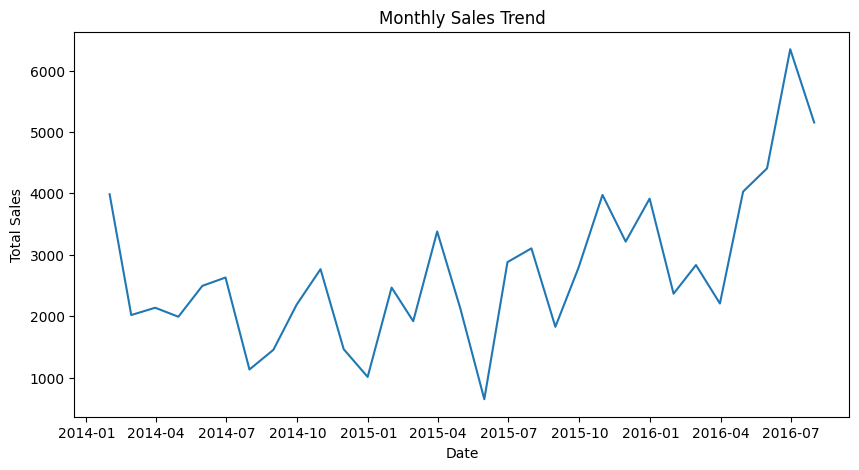

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(monthly_df['date'], monthly_df['sales'])
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


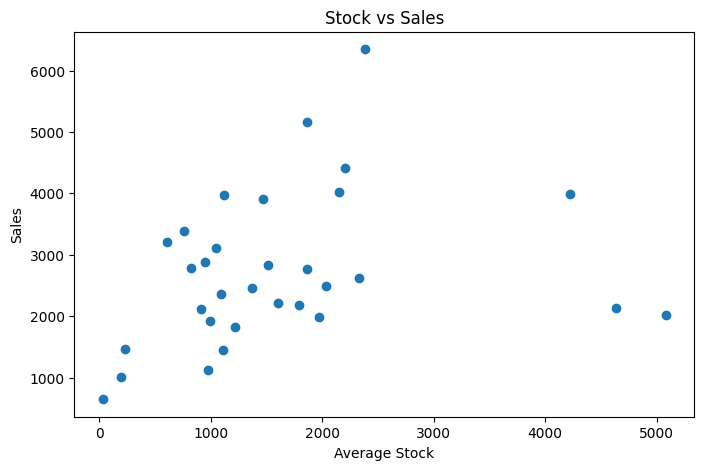

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(monthly_df['stock'], monthly_df['sales'])
plt.title("Stock vs Sales")
plt.xlabel("Average Stock")
plt.ylabel("Sales")
plt.show()


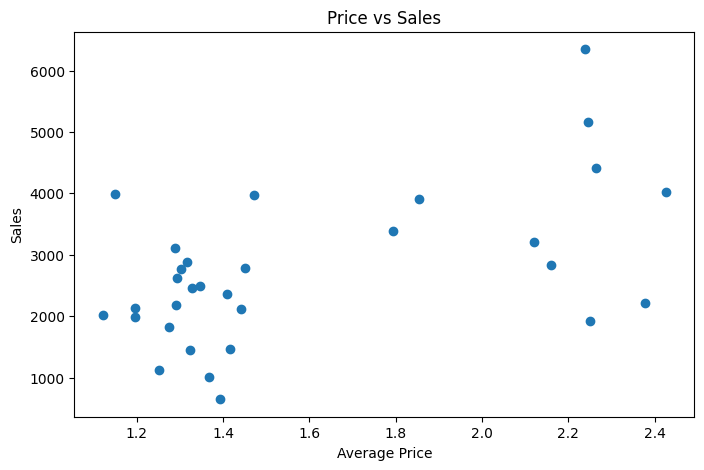

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(monthly_df['price'], monthly_df['sales'])
plt.title("Price vs Sales")
plt.xlabel("Average Price")
plt.ylabel("Sales")
plt.show()


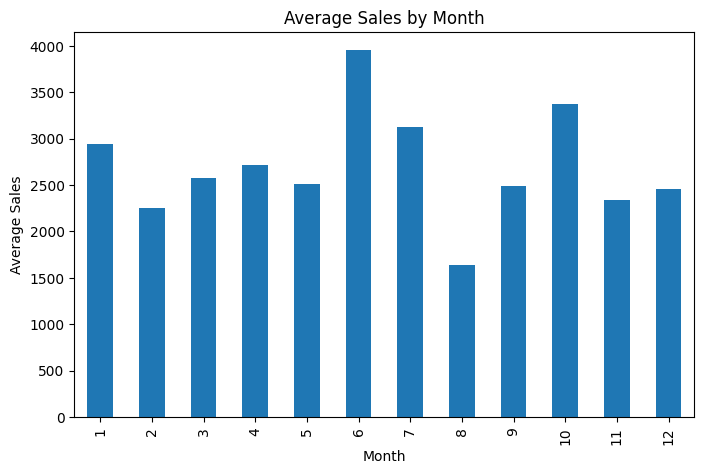

In [ ]:
monthly_avg = monthly_df.groupby('month')['sales'].mean()

plt.figure(figsize=(8,5))
monthly_avg.plot(kind='bar')
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

cluster_df = monthly_df[['sales', 'stock', 'price']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_df)


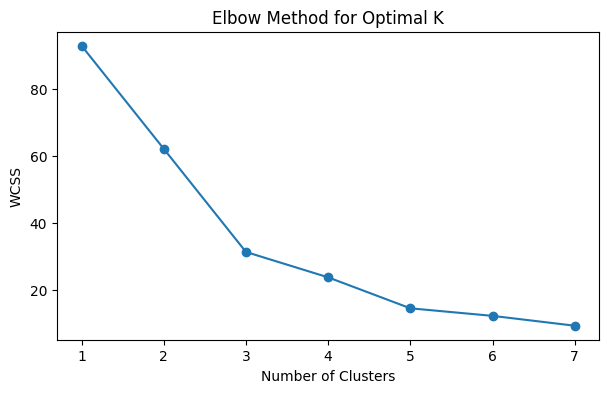

In [ ]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(range(1, 8), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
monthly_df['sales_cluster'] = kmeans.fit_predict(scaled_features)

monthly_df.head()


,date,sales,stock,price,year,month,sales_cluster
0,2014-01-31,3985,4224.566667,1.150000,2014,1,2
1,2014-02-28,2018,5085.923077,1.120769,2014,2,2
2,2014-03-31,2137,4635.137931,1.196552,2014,3,2
3,2014-04-30,1990,1975.166667,1.196667,2014,4,0
4,2014-05-31,2493,2036.032258,1.346129,2014,5,0


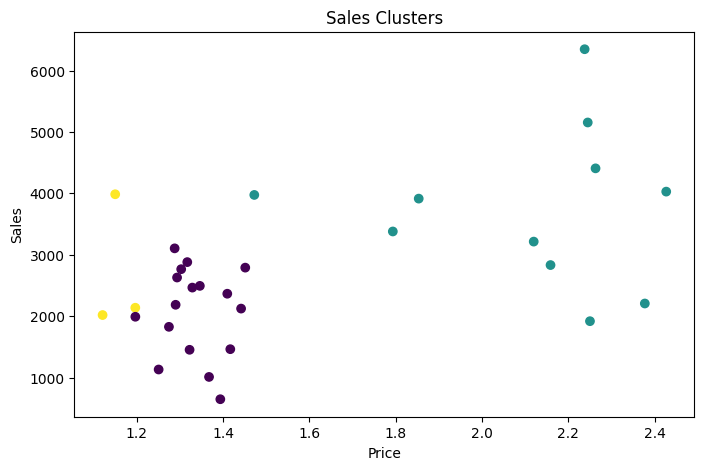

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(monthly_df['price'], monthly_df['sales'],
            c=monthly_df['sales_cluster'])
plt.xlabel("Price")
plt.ylabel("Sales")
plt.title("Sales Clusters")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Features
X = monthly_df[['price', 'stock', 'month', 'year']]

# Target
y = monthly_df['sales_cluster']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[4 0]
 [0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [ ]:
import pandas as pd

importance = pd.DataFrame({
    'feature': X.columns,
    'importance': clf.feature_importances_
}).sort_values(by='importance', ascending=False)

importance


,feature,importance
0,price,0.615475
1,stock,0.200530
2,month,0.093338
3,year,0.090657


In [ ]:
!pip install prophet


In [ ]:
from prophet import Prophet

prophet_df = monthly_df[['date', 'sales']].rename(columns={
    'date': 'ds',
    'sales': 'y'
})

prophet_df.head()


,ds,y
0,2014-01-31,3985
1,2014-02-28,2018
2,2014-03-31,2137
3,2014-04-30,1990
4,2014-05-31,2493


In [ ]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

model.fit(prophet_df)


INFO:prophet:n_changepoints greater than number of observations. Using 23.


In [ ]:
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
38,2017-03-31,4067.645613,3325.332543,4735.640567
39,2017-04-30,4854.993207,4177.855365,5502.989904
40,2017-05-31,4981.481145,4288.076418,5664.695874
41,2017-06-30,6456.576610,5800.278863,7185.635219
42,2017-07-31,5418.610039,4700.578648,6074.786218


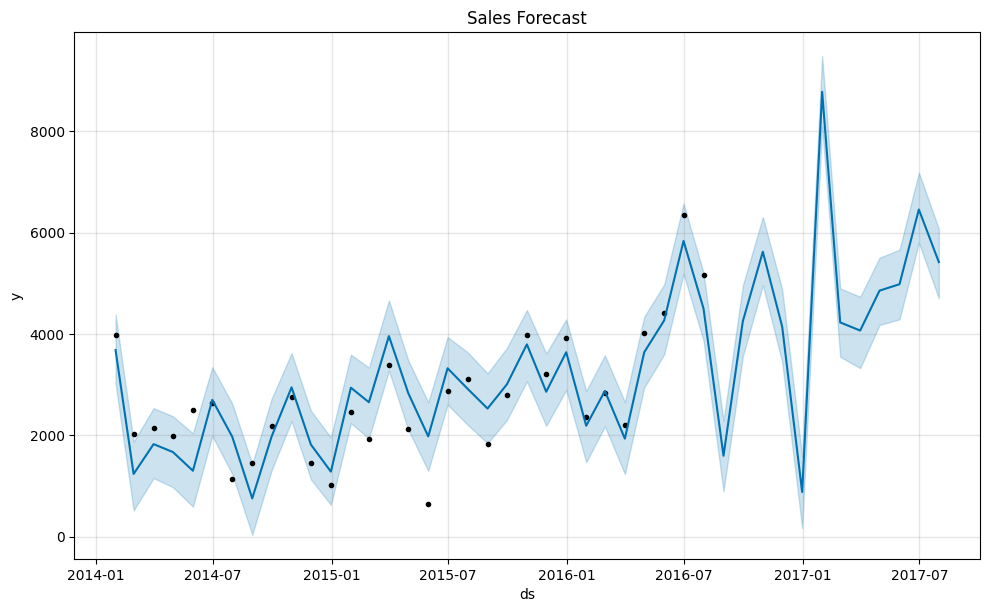

In [ ]:
model.plot(forecast)
plt.title("Sales Forecast")
plt.show()


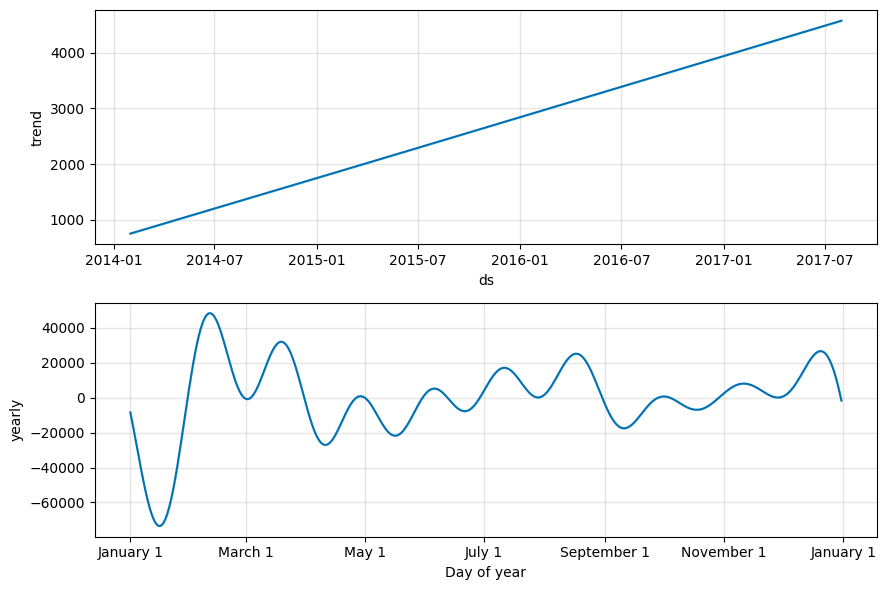

In [ ]:
model.plot_components(forecast)
plt.show()


In [ ]:
forecast_export = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_export = forecast_export.rename(columns={
    'ds': 'date',
    'yhat': 'forecast_sales',
    'yhat_lower': 'forecast_lower',
    'yhat_upper': 'forecast_upper'
})

forecast_export.head()


,date,forecast_sales,forecast_lower,forecast_upper
0,2014-01-31,3682.856289,3019.698955,4383.403474
1,2014-02-28,1237.187351,519.697524,1873.194923
2,2014-03-31,1825.917561,1155.245813,2537.115038
3,2014-04-30,1669.136383,976.209808,2374.563806
4,2014-05-31,1299.962331,591.644614,2038.363762


In [ ]:
actual_export = monthly_df[['date', 'sales', 'sales_cluster', 'price', 'stock']]

final_export = pd.merge(
    actual_export,
    forecast_export,
    on='date',
    how='left'
)

final_export.head()


,date,sales,sales_cluster,price,stock,forecast_sales,forecast_lower,forecast_upper
0,2014-01-31,3985,2,1.150000,4224.566667,3682.856289,3019.698955,4383.403474
1,2014-02-28,2018,2,1.120769,5085.923077,1237.187351,519.697524,1873.194923
2,2014-03-31,2137,2,1.196552,4635.137931,1825.917561,1155.245813,2537.115038
3,2014-04-30,1990,0,1.196667,1975.166667,1669.136383,976.209808,2374.563806
4,2014-05-31,2493,0,1.346129,2036.032258,1299.962331,591.644614,2038.363762


In [ ]:
final_export.to_csv("sales_forecast_dashboard.csv", index=False)
monthly_df.to_csv("monthly_sales_clusters.csv", index=False)


In [ ]:
from google.colab import files

files.download("sales_forecast_dashboard.csv")
files.download("monthly_sales_clusters.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install streamlit


In [ ]:
!pip install streamlit pyngrok


In [ ]:
# Kill ngrok tunnel from OS
!pkill -f ngrok


In [ ]:
from pyngrok import ngrok

# Kill all existing tunnels
ngrok.kill()
print("✅ All ngrok tunnels stopped")


✅ All ngrok tunnels stopped


In [ ]:
from google.colab import files
uploaded = files.upload()  # Select your CSVs


Saving monthly_sales_clusters (1).csv to monthly_sales_clusters (1) (1).csv
Saving sales_forecast_dashboard (1).csv to sales_forecast_dashboard (1) (1).csv


In [ ]:
%%writefile app.py
# ------------------------------
# Fully Enhanced Retail Sales Forecasting Dashboard with Indian Holidays
# ------------------------------

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Page setup
st.set_page_config(page_title="Retail Sales Dashboard", layout="wide")
st.title("🛒 Retail Sales Forecasting Dashboard")

# ------------------------------
# Load CSV files
# ------------------------------
df = pd.read_csv("sales_forecast_dashboard.csv")
monthly_df = pd.read_csv("monthly_sales_clusters.csv")

# Convert date columns to datetime
df['date'] = pd.to_datetime(df['date'])
monthly_df['date'] = pd.to_datetime(monthly_df['date'])

st.success("Data Loaded Successfully ✅")

# ------------------------------
# Add Indian Holiday Spike Column
# ------------------------------
holidays = [
    "2014-01-01",  # New Year
    "2014-01-14",  # Makar Sankranti / Pongal
    "2014-01-26",  # Republic Day
    "2014-03-17",  # Holi
    "2014-04-14",  # Good Friday
    "2014-08-15",  # Independence Day
    "2014-10-02",  # Gandhi Jayanti
    "2014-11-04",  # Diwali
    "2014-12-25",  # Christmas
    "2014-11-28",  # Black Friday
    "2015-01-01",  # New Year
    "2015-01-14",  # Makar Sankranti / Pongal
    "2015-01-26",  # Republic Day
    "2015-03-06",  # Holi
    "2015-04-03",  # Good Friday
    "2015-08-15",  # Independence Day
    "2015-10-02",  # Gandhi Jayanti
    "2015-11-11",  # Diwali
    "2015-12-25",  # Christmas
]

holidays = pd.to_datetime(holidays)
monthly_df['is_holiday'] = monthly_df['date'].isin(holidays).astype(int)

# ------------------------------
# Filter by Cluster
# ------------------------------
st.subheader("Filter by Sales Cluster")
cluster_option = st.selectbox(
    "Select Cluster",
    sorted(monthly_df['sales_cluster'].unique())
)

filtered_df = monthly_df[monthly_df['sales_cluster'] == cluster_option]

# ------------------------------
# KPI Cards (Update Based on Filter)
# ------------------------------
st.subheader("Key Performance Indicators (KPIs)")

col1, col2, col3, col4, col5 = st.columns(5)
col1.metric("Total Sales", filtered_df['sales'].sum())
col2.metric("Average Sales", round(filtered_df['sales'].mean(),2))
col3.metric("Max Sales", filtered_df['sales'].max())
col4.metric("Min Sales", filtered_df['sales'].min())
col5.metric("Holiday Sales Total", filtered_df[filtered_df['is_holiday']==1]['sales'].sum())

# ------------------------------
# Highlight Top 3 Months & Low Season
# ------------------------------
st.subheader("Top & Low Sales Months")

monthly_sales = filtered_df.groupby(filtered_df['date'].dt.to_period('M'))[['sales']].sum().reset_index()
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

sorted_sales = monthly_sales.sort_values(by='sales', ascending=False)
top_3 = sorted_sales.head(3)
low_1 = sorted_sales.tail(1)

st.markdown("**Top 3 Months with Highest Sales:**")
st.dataframe(top_3[['date','sales']])

st.markdown("**Lowest Sales Month (Low Season):**")
st.dataframe(low_1[['date','sales']])

# ------------------------------
# Actual vs Forecast Interactive Line Chart with Holiday Spikes
# ------------------------------
st.subheader("Actual vs Forecasted Sales with Holiday Spikes")

merged_df = pd.merge(
    df[['date','forecast_sales']],
    monthly_df[['date','sales','is_holiday']],
    on='date'
)

fig_line = go.Figure()

# Actual sales
fig_line.add_trace(go.Scatter(
    x=merged_df['date'], y=merged_df['sales'],
    mode='lines+markers', name='Actual Sales'
))

# Forecast sales
fig_line.add_trace(go.Scatter(
    x=merged_df['date'], y=merged_df['forecast_sales'],
    mode='lines+markers', name='Forecast Sales'
))

# Highlight holiday spikes
holiday_dates = merged_df[merged_df['is_holiday']==1]['date']
holiday_sales = merged_df[merged_df['is_holiday']==1]['sales']

fig_line.add_trace(go.Scatter(
    x=holiday_dates, y=holiday_sales,
    mode='markers', name='Holiday Spike',
    marker=dict(color='red', size=12, symbol='star')
))

fig_line.update_layout(
    title="Actual vs Forecasted Sales with Holiday Spikes",
    xaxis_title="Date",
    yaxis_title="Sales",
    xaxis_rangeslider_visible=True
)

st.plotly_chart(fig_line, use_container_width=True)

# ------------------------------
# Sales Clusters Scatter Chart
# ------------------------------
st.subheader("Sales Clusters by Price")

fig_scatter = px.scatter(
    filtered_df,
    x='price',
    y='sales',
    color='sales_cluster',
    size='stock',
    title=f"Sales Clusters (Filtered for Cluster {cluster_option})",
    color_continuous_scale=px.colors.sequential.Viridis
)
st.plotly_chart(fig_scatter, use_container_width=True)

# ------------------------------
# Monthly Sales Column Chart
# ------------------------------
st.subheader("Monthly Sales Performance")

fig_bar = px.bar(
    monthly_sales,
    x='date',
    y='sales',
    title=f"Monthly Sales for Cluster {cluster_option}",
    text='sales'
)
st.plotly_chart(fig_bar, use_container_width=True)

# ------------------------------
# Yearly Comparison Chart
# ------------------------------
st.subheader("Yearly Sales Comparison")

yearly_sales = filtered_df.groupby(filtered_df['date'].dt.year)[['sales']].sum().reset_index()
yearly_sales.rename(columns={'date':'year'}, inplace=True)

fig_year = px.bar(
    yearly_sales,
    x='year',
    y='sales',
    title=f"Total Sales per Year for Cluster {cluster_option}",
    text='sales'
)
st.plotly_chart(fig_year, use_container_width=True)

st.write("🎯 Dashboard now includes top 3 months, low season highlights, Indian holiday spikes, monthly & yearly comparison charts, and interactive cluster analysis!")


Overwriting app.py


In [ ]:
# Start Streamlit on port 8501
!streamlit run app.py --server.port 8501 &>/content/logs.txt &
print("✅ Streamlit App Running")

✅ Streamlit App Running


In [ ]:
from pyngrok import ngrok

ngrok.set_auth_token("37mwzBFWMitNDYzWFjgbk5nqAAp_7yiSjNnjeft3W6djU1wgL")


In [ ]:
from pyngrok import ngrok

# Start a fresh tunnel on 8501
public_url = ngrok.connect(8501)
print("🌐 Public URL:", public_url)


🌐 Public URL: NgrokTunnel: "https://bradly-unexploitative-anette.ngrok-free.dev" -> "http://localhost:8501"


In [ ]:
# Kill ngrok tunnel from OS
!pkill -f ngrok
